In [54]:
!pip install tk

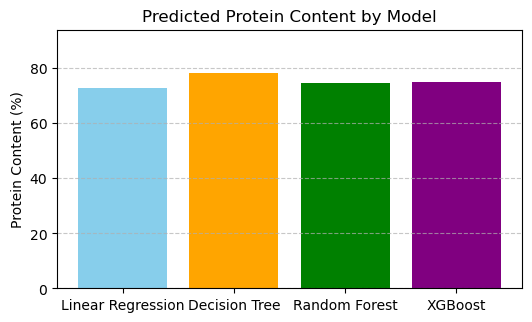

In [3]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load dataset
mydata = pd.read_excel("C:/Users/hp/Documents/Protein content.xlsx")

# Split dataset into features (X) and target (y)
x = mydata.drop('Protein purity', axis=1)
y = mydata['Protein purity']
x = np.array(x)
y = np.array(y)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train models
linear_model = LinearRegression().fit(x_train, y_train)
dec_model = DecisionTreeRegressor().fit(x_train, y_train)
random_model = RandomForestRegressor().fit(x_train, y_train)
xgb_model = XGBRegressor().fit(x_train, y_train)

# Evaluate models
models = {
    "Linear Regression": linear_model,
    "Decision Tree": dec_model,
    "Random Forest": random_model,
    "XGBoost": xgb_model
}

results = []
for name, model in models.items():
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    results.append([name, mse_train, r2_train, mse_test, r2_test])

models_df = pd.DataFrame(results, columns=['Model', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2'])


# === GUI Section ===
def predict_and_plot():
    try:
        pH = float(entry_ph.get())
        temp = float(entry_temp.get())
        time = float(entry_time.get())
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")
        return

    user_data = pd.DataFrame([[pH, temp, time]])
    predictions = []
    for model in models.values():
        predictions.append(model.predict(user_data)[0])

    # Show prediction results
    for i, val in enumerate(predictions):
        prediction_labels[i]['text'] = f"{val:.2f} %"

    # Plot predictions
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(model_names, predictions, color=['skyblue', 'orange', 'green', 'purple'])
    ax.set_title("Predicted Protein Content by Model")
    ax.set_ylabel("Protein Content (%)")
    ax.set_ylim(0, max(predictions) * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for widget in frame_plot.winfo_children():
        widget.destroy()

    canvas = FigureCanvasTkAgg(fig, master=frame_plot)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Tkinter window
root = tk.Tk()
root.title("Protein Content Prediction - ML Models")
root.geometry("900x650")

# === Top Section: Table Display ===
frame_top = tk.Frame(root)
frame_top.pack(pady=10)

tk.Label(frame_top, text="Model Evaluation Metrics", font=('Helvetica', 16, 'bold')).pack()

tree = ttk.Treeview(frame_top, columns=list(models_df.columns), show='headings', height=5)
for col in models_df.columns:
    tree.heading(col, text=col)
    tree.column(col, anchor=tk.CENTER)

for _, row in models_df.iterrows():
    tree.insert('', tk.END, values=list(row))

tree.pack()

# === Middle Section: Input + Predictions ===
frame_mid = tk.Frame(root)
frame_mid.pack(pady=20)

tk.Label(frame_mid, text="Enter Input Features:", font=('Helvetica', 14)).grid(row=0, column=0, columnspan=2)

tk.Label(frame_mid, text="pH:").grid(row=1, column=0, sticky="e")
entry_ph = tk.Entry(frame_mid)
entry_ph.grid(row=1, column=1)

tk.Label(frame_mid, text="Temperature (°C):").grid(row=2, column=0, sticky="e")
entry_temp = tk.Entry(frame_mid)
entry_temp.grid(row=2, column=1)

tk.Label(frame_mid, text="Time (min):").grid(row=3, column=0, sticky="e")
entry_time = tk.Entry(frame_mid)
entry_time.grid(row=3, column=1)

tk.Button(frame_mid, text="Predict", command=predict_and_plot, bg="green", fg="white").grid(row=4, column=0, columnspan=2, pady=10)

# === Display Predictions ===
model_names = list(models.keys())
prediction_labels = []
for i, model_name in enumerate(model_names):
    tk.Label(frame_mid, text=f"{model_name} Prediction:").grid(row=5+i, column=0, sticky="e")
    label = tk.Label(frame_mid, text="-")
    label.grid(row=5+i, column=1, sticky="w")
    prediction_labels.append(label)

# === Bottom Section: Plot ===
frame_plot = tk.Frame(root)
frame_plot.pack(pady=10)

root.mainloop()